# Breve EDA

In [1]:
# Punto 1)
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("./BDs/titanic.csv")
# Esto tuve que ejecutar para que el csv que consegui en GitHub me funcionara 
columnas = ['PassengerId', 'Lname', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']
df = df.drop(columnas, axis = 'columns')
df.replace({'Sex' : 'female'}, 1, inplace=True)
df.replace({'Sex' : 'male'}, 0, inplace=True)
df.fillna({'Age':0}, inplace = True)

In [2]:
# Punto 2)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [3]:
# Punto 3)
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch
151,1,1,1,22.0,1,0
152,0,3,0,55.5,0,0
153,0,3,0,40.5,0,2
154,0,3,0,0.0,0,0
155,0,1,0,51.0,0,1


In [4]:
# Punto 4)
print(df.shape)

(156, 6)


In [5]:
# Punto 5)
df.count()

Survived    156
Pclass      156
Sex         156
Age         156
SibSp       156
Parch       156
dtype: int64

In [6]:
# Punto 6)
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [7]:
# Punto 7)
type(df)

pandas.core.frame.DataFrame

In [8]:
# Punto 8)
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')


## ML Modelo de clasificacion

In [9]:
# Punto 9)
X = df.drop('Survived', axis = 1) # Elimina de mi dataset la variable a predecir
y = df.Survived # Definimos el Target

In [10]:
# Punto 10)
# Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split

# Me quedo con 30% para test y 70% para train, 42 es una semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [11]:
# Punto 11, 12 y 13)
# Importamos el modelo
from sklearn.tree import DecisionTreeClassifier 
# Creamos el modelo, profundidad 2 y selctividad 42
tree = DecisionTreeClassifier(max_depth = 2, random_state = 42)

In [12]:
# Punto 14)
#Entrenamos el modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [13]:
# Punto 15)
y_train_pred = tree.predict(X_train) # Prediccion en el train
y_test_pred = tree.predict(X_test) # Prediccion en el test

In [14]:
# Punto 15)
from sklearn.metrics import accuracy_score

# Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento: ', train_accuracy)
print('% de aciertos sobre el set de evaluacion: ', test_accuracy)


% de aciertos sobre el set de entrenamiento:  0.8348623853211009
% de aciertos sobre el set de evaluacion:  0.7446808510638298


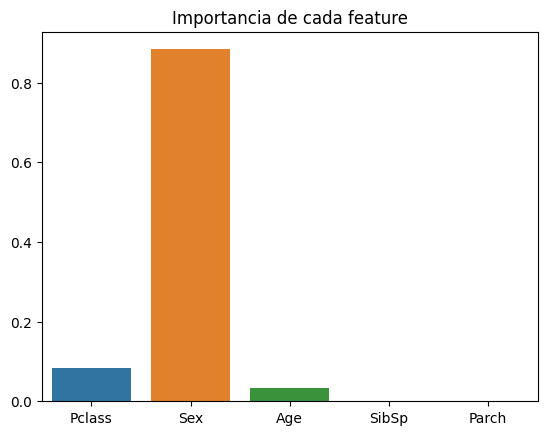

In [15]:
# Punto 16)
import seaborn as sns
import matplotlib.pyplot as plt

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature')
plt.show()